#Name - Arjun A.
#Roll number - 181CO109
#Date of submission - 12-3-2021
This notebook was written in google colab. <br>Link to view notebook<br>
https://colab.research.google.com/drive/11ePFuMW86B5pJxCEZmLyByCox4RZC2xg?usp=sharing

#ML Lab 8 - SVM algorithms
This notebook is used to implement the SVM or Support Vector Machine Algorithms to classify a handwritten digits dataset. 

##Importing necessary packages


In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits 
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## Importing the images dataset and splitting the dataset
It is taken from the test set of https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits<br>
Size of the image - 8 x 8 <br>
The dataset has been split 70:30 into train and test datasets. 

In [2]:
def loadDataset():
  digits = load_digits()
    
  #Flattening image
  print('Shape of np array before flattening -', np.shape(digits.images))
  n_samples = len(digits.images)
  data = digits.images.reshape((n_samples, -1))
  print('Shape of np array after flattening -', np.shape(data))
  print()

  #Printing a few examples
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
  for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

  #Splitting the dataset
  X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.7, random_state = 100, shuffle = False) #Specifying random_state to get the same dataset split everytime 

  #Returning 
  return data, digits.target, X_train, X_test, y_train, y_test



Shape of np array before flattening - (1797, 8, 8)
Shape of np array after flattening - (1797, 64)

X shape - (1797, 64)
Y shape - (1797,)

Test dataset size
X_test - 1258 
y_test - 1258 

Train dataset size
X_train - 539 
y_train - 539



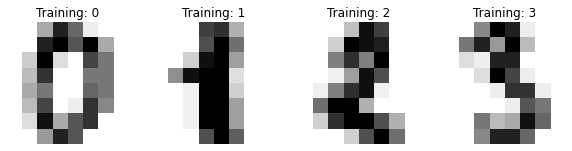

In [3]:
X, Y, X_train, X_test, y_train, y_test = loadDataset()

#Original flattened dataset shape
print('X shape -', np.shape(X))
print('Y shape -', np.shape(Y))
print()

#Printing size of the split
print('Test dataset size\nX_test -', len(X_test), '\ny_test -', len(y_test), '\n')
print('Train dataset size\nX_train -', len(X_train), '\ny_train -', len(y_train))
print()

## Defining model(s)

In [4]:
linearSVM = SVC(kernel = 'linear')
polySVM = SVC(kernel = 'poly')
rbfSVM = SVC(kernel = 'rbf')
sigSVM = SVC(kernel = 'sigmoid')

##Training all models on the train dataset

In [5]:
linearSVM.fit(X_train, y_train)
polySVM.fit(X_train, y_train)
rbfSVM.fit(X_train, y_train)
sigSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Using the model to classify images in the test dataset

In [6]:
linearPred = linearSVM.predict(X_test)
polyPred = polySVM.predict(X_test)
rbfPred = rbfSVM.predict(X_test)
sigPred = sigSVM.predict(X_test)

## Function for class-wise accuracy to compare between different SVMs

In [7]:
def accuracyClassWise(cm):
  #Now the normalize the diagonal entries
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  #The diagonal entries are the accuracies of each class
  return list(cm.diagonal())

##Finding accuracy for all models using the test dataset

### Linear SVM

In [8]:
print('Report for Linear SVM\n')
print(classification_report(y_test, linearPred))
print('\n Confusion matrix')
print(confusion_matrix(y_test, linearPred))
linearCA = accuracyClassWise(confusion_matrix(y_test, linearPred))

Report for Linear SVM

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       123
           1       0.90      0.92      0.91       127
           2       0.99      0.98      0.99       122
           3       0.95      0.92      0.94       128
           4       0.97      0.96      0.96       128
           5       0.93      0.96      0.95       128
           6       0.98      0.98      0.98       128
           7       0.95      0.97      0.96       126
           8       0.90      0.88      0.89       121
           9       0.90      0.88      0.89       127

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258


 Confusion matrix
[[122   0   0   0   1   0   0   0   0   0]
 [  0 117   1   0   0   0   1   0   3   5]
 [  1   0 120   1   0   0   0   0   0   0]
 [  0   0   0 118   0   4   0   1   5   0]
 [  0   0   0   0 123   0  

### Polynomial SVM

In [9]:
print('Report for Polynomial SVM\n')
print(classification_report(y_test, polyPred))
print('\n Confusion matrix')
print(confusion_matrix(y_test, polyPred))

polyCA = accuracyClassWise(confusion_matrix(y_test, polyPred))

Report for Polynomial SVM

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       123
           1       0.94      0.96      0.95       127
           2       0.99      0.97      0.98       122
           3       0.95      0.93      0.94       128
           4       0.98      0.96      0.97       128
           5       0.92      0.95      0.93       128
           6       0.98      0.98      0.98       128
           7       0.98      0.98      0.98       126
           8       0.94      0.91      0.92       121
           9       0.91      0.94      0.92       127

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258


 Confusion matrix
[[122   0   0   0   1   0   0   0   0   0]
 [  0 122   0   0   0   1   1   0   2   1]
 [  1   0 118   3   0   0   0   0   0   0]
 [  0   0   1 119   0   4   0   1   3   0]
 [  0   0   0   0 123  

### RBF(Radial Basis Function) SVM

In [10]:
print('Report for RBF SVM\n')
print(classification_report(y_test, rbfPred))
print('\n Confusion matrix')
print(confusion_matrix(y_test, rbfPred))

rbfCA = accuracyClassWise(confusion_matrix(y_test, rbfPred))

Report for RBF SVM

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.91      0.89      0.90       127
           2       0.98      0.98      0.98       122
           3       0.99      0.90      0.94       128
           4       0.98      0.96      0.97       128
           5       0.93      0.96      0.95       128
           6       0.98      0.98      0.98       128
           7       0.95      0.98      0.97       126
           8       0.85      0.88      0.87       121
           9       0.88      0.92      0.90       127

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258


 Confusion matrix
[[122   0   0   0   1   0   0   0   0   0]
 [  0 113   2   0   0   1   0   0  11   0]
 [  0   0 120   0   0   0   0   0   0   2]
 [  0   0   0 115   0   3   0   4   5   1]
 [  0   0   0   0 123   0   0 

### Sigmoid SVM

In [11]:
print('Report for Sigmoid SVM\n')
print(classification_report(y_test, sigPred))
print('\n Confusion matrix')
print(confusion_matrix(y_test, sigPred))

sigCA = accuracyClassWise(confusion_matrix(y_test, sigPred))

Report for Sigmoid SVM

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       123
           1       0.77      0.55      0.64       127
           2       0.90      0.91      0.90       122
           3       0.96      0.84      0.90       128
           4       0.94      0.89      0.92       128
           5       0.93      0.86      0.89       128
           6       0.92      0.98      0.95       128
           7       0.86      0.91      0.89       126
           8       0.66      0.80      0.73       121
           9       0.73      0.85      0.79       127

    accuracy                           0.86      1258
   macro avg       0.86      0.86      0.86      1258
weighted avg       0.86      0.86      0.86      1258


 Confusion matrix
[[121   0   0   0   2   0   0   0   0   0]
 [  1  70  13   0   2   0   5   4  28   4]
 [  1   1 111   3   0   0   0   1   1   4]
 [  0   2   0 108   0   3   0   4   6   5]
 [  3   0   0   0 114   0 

### Comparing class-wise accuracies of the different SVMs


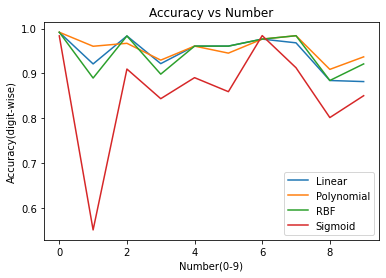

In [12]:
fig = plt.figure()
ax = plt.axes()
plt.plot([0,1,2,3,4,5,6,7,8,9], linearCA, label = 'Linear')
plt.plot([0,1,2,3,4,5,6,7,8,9], polyCA, label = 'Polynomial')
plt.plot([0,1,2,3,4,5,6,7,8,9], rbfCA, label = 'RBF')
plt.plot([0,1,2,3,4,5,6,7,8,9], sigCA, label = 'Sigmoid')
plt.xlabel('Number(0-9)')
plt.ylabel('Accuracy(digit-wise)')
plt.title('Accuracy vs Number')
plt.legend()
plt.savefig('181CO109 SVM accuracy graph.pdf')
plt.show()